# ANÁLISE EXPLORATÓRIA DO DATASET

### IMPORTANDO OS PACOTES NECESSÁRIOS

In [213]:
#importanto os pacotes necessáiros
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [214]:

arquivo = pd.read_csv("C:\Machine-Learning-Diagnostico-Presuntivo-Duas-Doenca-Sistema-Urinario\AcuteInflammationsDataSet.csv")
arquivo.head()


,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [215]:
#Arrumando as colunas categoricas nominal (no = 0, yes =1)
arquivo['Nausea']= np.where(arquivo['Occurrence of nausea'] == 'no', 0,1)
arquivo.drop('Occurrence of nausea', axis=1, inplace=True)

arquivo['Lumbar']= np.where(arquivo[' Lumbar pain'] == 'no', 0,1)
arquivo.drop(' Lumbar pain', axis=1, inplace=True)

arquivo['Urine']= np.where(arquivo['Urine pushing (continuous need for urination)'] == 'no', 0,1)
arquivo.drop('Urine pushing (continuous need for urination)', axis=1, inplace=True)

arquivo['Micturition']= np.where(arquivo[' Micturition pains'] == 'no', 0,1)
arquivo.drop(' Micturition pains', axis=1, inplace=True)

arquivo['Urethra'] = np.where(arquivo['Burning of urethra, itch, swelling of urethra outlet '] == 'no', 0,1)
arquivo.drop('Burning of urethra, itch, swelling of urethra outlet ', axis=1, inplace=True)

arquivo['Inflammation of urinary'] = np.where(arquivo['decision: Inflammation of urinary bladder'] == 'no', 0,1)
arquivo.drop('decision: Inflammation of urinary bladder', axis=1, inplace=True)

arquivo['Nephritis of renal'] = np.where(arquivo['decision: Nephritis of renal pelvis origin'] == 'no', 0,1)
arquivo.drop('decision: Nephritis of renal pelvis origin', axis=1, inplace=True)

arquivo.head()

,Temperature of patient,Nausea,Lumbar,Urine,Micturition,Urethra,Inflammation of urinary,Nephritis of renal
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [216]:
#Analisando as variaveis
arquivo.describe()

,Temperature of patient,Nausea,Lumbar,Urine,Micturition,Urethra,Inflammation of urinary,Nephritis of renal
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.724167,0.241667,0.583333,0.666667,0.491667,0.416667,0.491667,0.416667
std,1.819132,0.429888,0.495074,0.473381,0.502027,0.495074,0.502027,0.495074
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.600000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


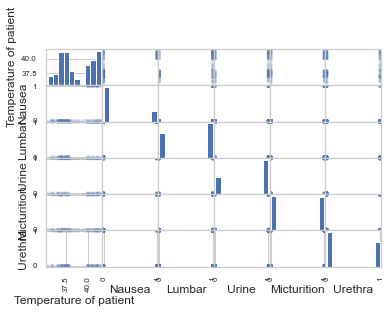

In [232]:

df = pd.DataFrame(arquivo, columns=['Temperature of patient', 'Nausea', 'Lumbar','Urine','Micturition','Urethra'])
ax2 = pd.plotting.scatter_matrix(df,alpha=0.2)


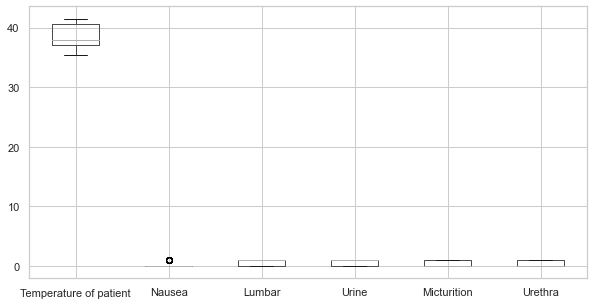

In [227]:
plt.figure(figsize=(10,5))
arquivo.boxplot(column=['Temperature of patient', 'Nausea', 'Lumbar','Urine','Micturition','Urethra'])
plt.show()

# IMPLEMENTAÇÃO DO MODELO RANDOM FAROEST

### IMPORTANDO OS PACOTES NECESSÁRIOS

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import seaborn as sns

### SEPARANDO AS VARIÁVEIS ENTRE PREDITORES E VARIÁVEIS ALVO 
1. VARIÁVEIS PREDITORES (X): 
    * TEMPERATURE
    * NAUSEA
    * LUMBAR
    * URINE
    * MICTURITION
    * URETHRA
    
2. VARIÁVEIS ALVO (Y):
    * INFLAMMATION OF URINARY
    * NEPHRITIS OF RENAL



In [242]:
x = arquivo.drop({'Inflammation of urinary', 'Nephritis of renal'}, axis=1)
y = arquivo[{'Inflammation of urinary', 'Nephritis of renal'}]

### OBSERVAÇÃO
1. REALIZAR A NORMAÇÃO DE X E Y
2. 20% DOS DADOS DO DATASET SERVIRÁ PARA TESTE E 80% PARA TREINO

In [243]:
#Feature Scaling (Normalização)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_treino= sc.fit_transform(x_treino)
x_teste = sc.transform(x_teste)

In [250]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size =0.2, random_state = 10)

In [251]:
modelo = RandomForestClassifier()
modelo.fit(x_treino, y_treino)

RandomForestClassifier()

In [252]:
y_predict = modelo.predict(x_teste)

In [258]:
acuracia = metrics.accuracy_score(y_teste, y_predict)
print(f'acuriacia é: {acuracia}')

precisao = metrics.precision_score(y_teste, y_predict, average='micro')
print(f'precisão é: {precisao}')

revocacao = metrics.recall_score(y_teste, y_predict, average='micro')
print(f'revocação é: {revocacao}')

f1_score = metrics.f1_score(y_teste, y_predict, average='micro')
print(f'f1 score é: {f1_score}')

acuriacia é: 1.0
precisão é: 1.0
revocação é: 1.0
f1 score é: 1.0


Text(0.5, 0.98, 'RESULTADOS')

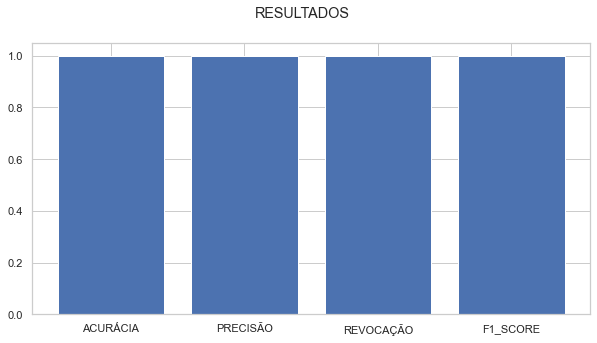

In [259]:
data = {'ACURÁCIA':acuracia, 'PRECISÃO':precisao, 'REVOCAÇÃO':revocacao, 'F1_SCORE':f1_score}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(10, 5), sharey=True)
axs.bar(names, values)
fig.suptitle('RESULTADOS')

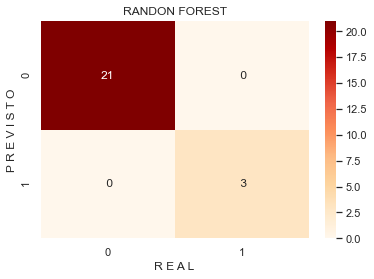

In [264]:

sns.heatmap(metrics.confusion_matrix(y_teste.values.argmax(axis=1), y_predict.argmax(axis=1)), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('RANDON FOREST')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### QUAIS A CARACTERÍSTICAS SÃO IMPORTANTES PARA A PREVISÃO

In [261]:
feature_important = pd.Series(modelo.feature_importances_, index=x_treino.columns).sort_values(ascending=False)
feature_important

Temperature of patient    0.293693
Lumbar                    0.264855
Urine                     0.193829
Micturition               0.108593
Nausea                    0.094681
Urethra                   0.044349
dtype: float64

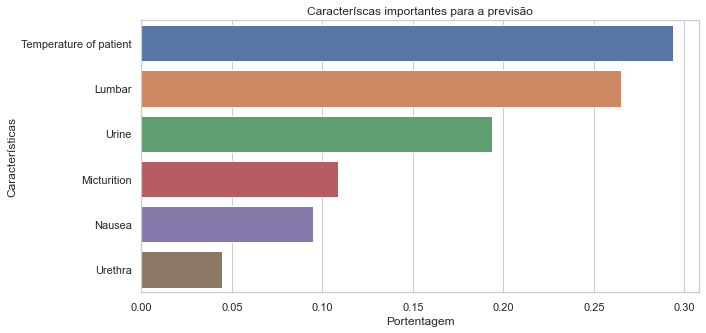

In [262]:
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(x=feature_important, y=feature_important.index)

_ = plt.xlabel('Portentagem')
_ = plt.ylabel('Características')
_ = plt.title('Caracteríscas importantes para a previsão')
plt.show()